#Project: SALES PREDICTION USING PYTHON

#Importing important libraries, Reading dataset and Analyzing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#Getting the shape of dataset
df.shape

(200, 4)

In [6]:
#Getting the duplicates
df.duplicated().sum()

0

In [7]:
#Getting the Null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
#Getting the EDA
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


*data is already cleaned, we can dive straight into the univariate and multivariate analysis*

* Making a copy of the original data to prevent any inconvenience

In [9]:
df1 = df.copy()

#Univariate Analysis

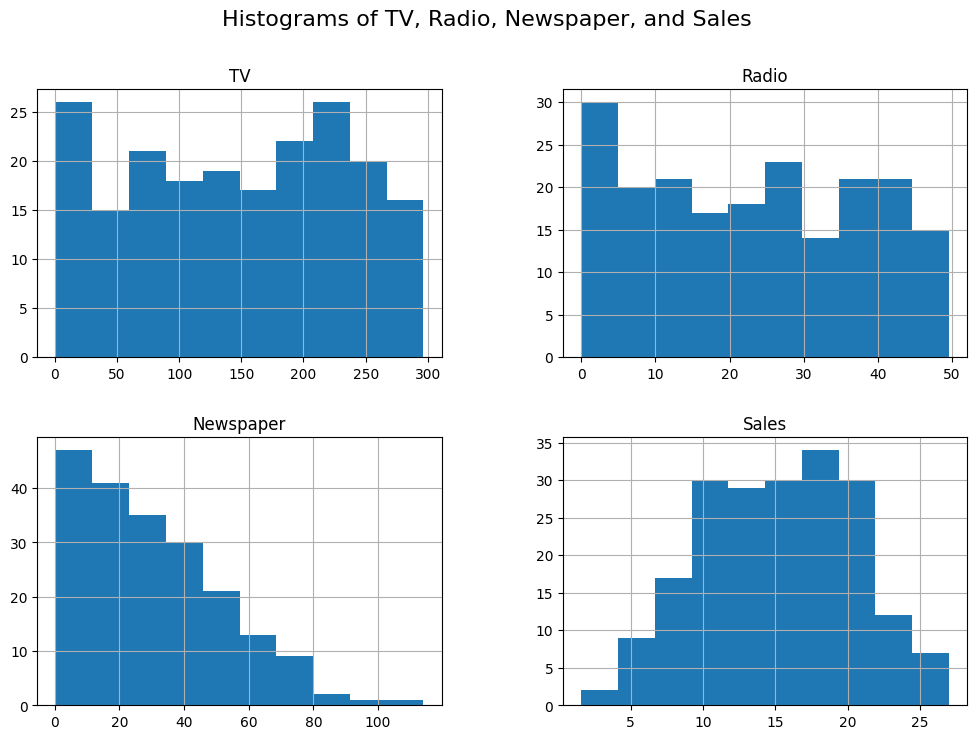

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#using histogram
df1.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms of TV, Radio, Newspaper, and Sales', fontsize=16)
plt.show()

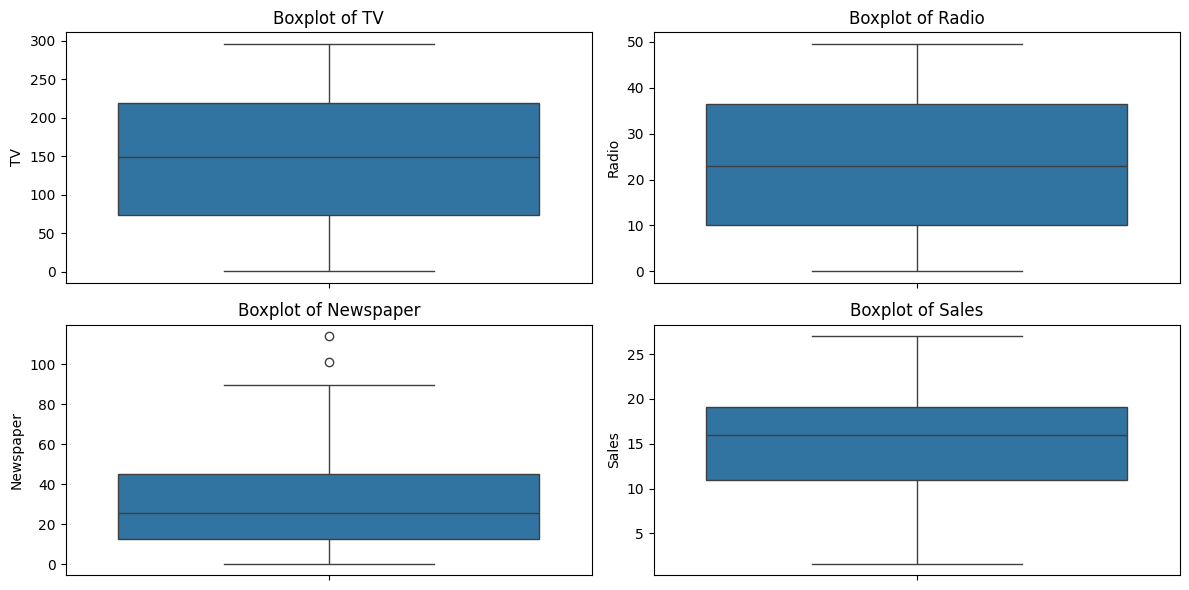

In [11]:
# Boxplots for checking outliers
features = ['TV', 'Radio', 'Newspaper', 'Sales']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df1, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#Insights of univariate analysis

* **TV and Radio:** Advertising investments are well-distributed and have a steady influence on sales.

* **Newspaper:** Expenditures, on the other hand, show more variability with outliers, indicating that this medium not be as consistently impactful for sales.
* **Sales:** Are normally distributed, which is ideal for modeling and prediction.

#Multivariate Analysis

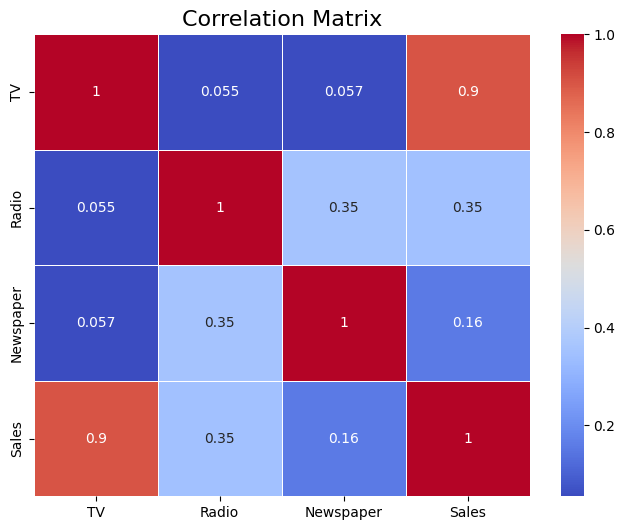

In [12]:
# Correlation matrix
corr_matrix = df1.corr()

#Using Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

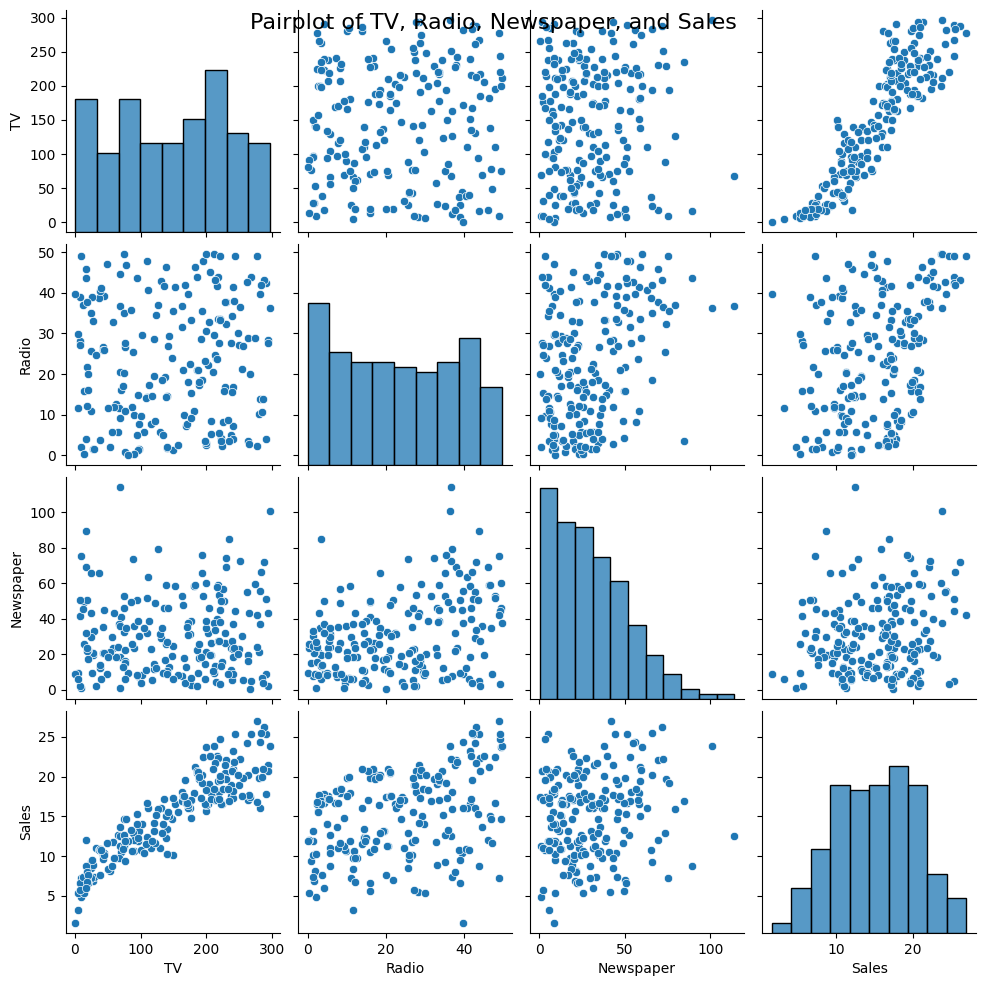

In [13]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df1)
plt.suptitle('Pairplot of TV, Radio, Newspaper, and Sales', fontsize=16)
plt.show()

#Preprocessing

In [14]:
#handle outliers
def remove_outliers(df1, columns):

    for column in columns:
        #Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)

        # Cal IQR
        IQR = Q3 - Q1

        #lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

    return df1

#Apply the function
df1 = remove_outliers(df1, ['TV', 'Radio', 'Newspaper', 'Sales'])

print(df1)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[198 rows x 4 columns]


In [15]:
#normalization
#using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df1), columns=df1.columns)

#Standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df1), columns=df1.columns)

#Log Transformation for Right-Skewed Column
df_transformed = df1.copy()
df_transformed['Newspaper'] = np.log1p(df_transformed['Newspaper'])

#Print transformed DataFrames
print("\nNormalized Data:\n", df_normalized.head())
print("\nStandardized Data:\n", df_standardized.head())
print("\nLog-transformed Data:\n", df_transformed.head())


Normalized Data:
          TV     Radio  Newspaper     Sales
0  0.783202  0.762097   0.773288  0.807087
1  0.149539  0.792339   0.502806  0.346457
2  0.056333  0.925403   0.774411  0.409449
3  0.514851  0.832661   0.653199  0.586614
4  0.614886  0.217742   0.652076  0.641732

Standardized Data:
          TV     Radio  Newspaper     Sales
0  0.978697  0.989521   1.932998  1.331341
1 -1.199012  1.090705   0.751313 -0.893900
2 -1.519332  1.535913   1.937901 -0.589594
3  0.056456  1.225616   1.408349  0.266268
4  0.400243 -0.831784   1.403446  0.532536

Log-transformed Data:
       TV  Radio  Newspaper  Sales
0  230.1   37.8   4.251348   22.1
1   44.5   39.3   3.830813   10.4
2   17.2   45.9   4.252772   12.0
3  151.5   41.3   4.085976   16.5
4  180.8   10.8   4.084294   17.9


#Model Building

* Model Comparison **LinearRegression**, **RandomForestRegressor** and **SVR**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split # Import train_test_split

X = df_standardized[['TV', 'Radio', 'Newspaper']]
y = df_standardized['Sales']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Making predictions
y_pred = model.predict(X_test)

#Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#Model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Absolute Error (MAE): 0.23414019687181004
Root Mean Squared Error (RMSE): 0.29560747219714933
Model Coefficients: [0.87465205 0.28481229 0.02897281]
Model Intercept: -0.0004053002138428626


Linear Regression:
MSE: 0.08738377761878843, MAE: 0.23414019687181004, R2 Score: 0.9130003152798273

Random Forest:
MSE: 0.03700989259589458, MAE: 0.16176745576011198, R2 Score: 0.963152783329912

Support Vector Regressor:
MSE: 0.07048394234941763, MAE: 0.19557729397491735, R2 Score: 0.9298258678059748


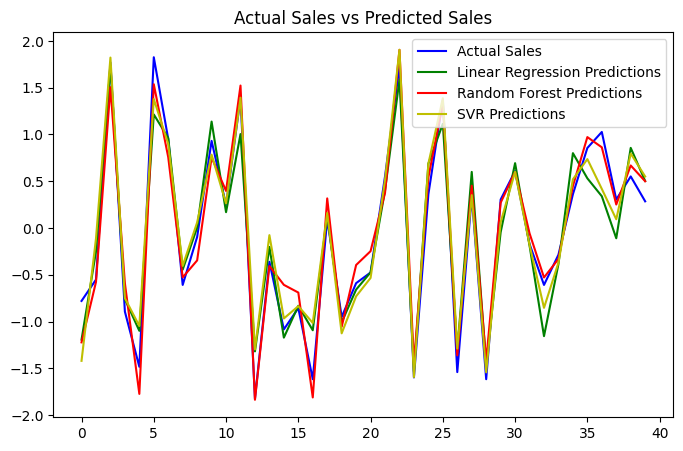

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR # Import the SVR class
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import r2_score here

X = df_standardized[['TV', 'Radio', 'Newspaper']]
y = df_standardized['Sales']

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Support Vector Regressor [SVR]
svr_model = SVR()
svr_model.fit(X_train, y_train)

#Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse}, MAE: {mae}, R2 Score: {r2}')
    return y_pred

#Output
print("Linear Regression:")
linear_pred = evaluate_model(linear_model, X_test, y_test)

print("\nRandom Forest:")
rf_pred = evaluate_model(rf_model, X_test, y_test)

print("\nSupport Vector Regressor:")
svr_pred = evaluate_model(svr_model, X_test, y_test)

#Visualization of Results
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual Sales', color='b')
plt.plot(linear_pred, label='Linear Regression Predictions', color='g')
plt.plot(rf_pred, label='Random Forest Predictions', color='r')
plt.plot(svr_pred, label='SVR Predictions', color='y')
plt.legend()
plt.title('Actual Sales vs Predicted Sales')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer # Import make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

#Define the models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()
svr = SVR()

#Scoring metric for cross-validation
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)

#Perform 5-fold cross-validation across all models
cv_folds = 5

X = df_standardized[['TV', 'Radio', 'Newspaper']]
y = df_standardized['Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Linear Regression
linear_reg_mse = cross_val_score(linear_reg, X_scaled, y, scoring=mse_scorer, cv=cv_folds)
linear_reg_mae = cross_val_score(linear_reg, X_scaled, y, scoring=mae_scorer, cv=cv_folds)

#Random Forest
random_forest_mse = cross_val_score(random_forest, X_scaled, y, scoring=mse_scorer, cv=cv_folds)
random_forest_mae = cross_val_score(random_forest, X_scaled, y, scoring=mae_scorer, cv=cv_folds)

#SVR
svr_mse = cross_val_score(svr, X_scaled, y, scoring=mse_scorer, cv=cv_folds)
svr_mae = cross_val_score(svr, X_scaled, y, scoring=mae_scorer, cv=cv_folds)

#Cal avg-scores
print("Linear Regression:")
print("Average MSE:", linear_reg_mse.mean())
print("Average MAE:", linear_reg_mae.mean())

print("\nRandom Forest:")
print("Average MSE:", random_forest_mse.mean())
print("Average MAE:", random_forest_mae.mean())

print("\nSupport Vector Regressor:")
print("Average MSE:", svr_mse.mean())
print("Average MAE:", svr_mae.mean())

Linear Regression:
Average MSE: 0.10433221577980527
Average MAE: 0.2420575315002466

Random Forest:
Average MSE: 0.05729729418005135
Average MAE: 0.17297885977678357

Support Vector Regressor:
Average MSE: 0.09943012394637248
Average MAE: 0.22036934302318983


#Analysis

* Random Forest has the lowest MSE and MAE, indicating that it performed the best among the three models.
* Linear Regression and Support Vector Regressor showed similar performance, with Linear Regression having slightly higher error metrics.